In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls drive/MyDrive/



 avg.yields.xlsx	  resultCard.pdf	      umer_usman_resume.pdf
 avg_yields.xlsx	 'Sessional 1 lab Hci.docx'  'Untitled document.gdoc'
'Colab Notebooks'	 'SPM Lab Section C C'	     'Untitled form.gform'
 combined_data.csv	  transcript.jpeg	      X1.npy
 DrowsyDataSet		 'T-Shirt Sign Up.gform'      X.npy
'HCI-Lab FA17-BSE-C'	  umer.jpeg		      X_test_transformed_1.csv
'lab assign 1.docx'	  umer-res.pdf		      X_train_transformed_1.csv
 merged_data.csv	  umer__res.pdf		      y1.npy
 mergeProject		  umer-resume.pdf	      y.npy
 punjab_crop_yield_data   umerSecrets.txt


In [ ]:
districts = [
    "attock", "rawalpindi", "jhelum", "chakwal", "sargodha", "khushab",
    "mianwali", "bhakkar", "faisalabad", "toba_tek_singh", "jhang", "chiniot",
    "gujrat", "mandi_bahaudin", "sialkot", "narowal", "gujranwala", "hafizabad",
    "sheikhupura", "nankana", "lahore", "kasur", "okara", "sahiwal",
    "pakpattan", "multan", "lodhran", "khanewal", "vehari", "muzafargarh",
    "layyah", "d_g_khan", "rajanpur", "bahawalpur", "r_y_khan", "bahawalnagar"
]


# Folder where your files are stored
data_folder = 'drive/MyDrive/punjab_crop_yield_data/'

# Start and end year of your dataset
start_year = 16
end_year = 22

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Dictionary to count the number of files read for each district
file_counts = {district: 0 for district in districts}

# Loop over each district and year
for district in districts:
    for year in range(start_year, end_year + 1):
        # Construct file name
        filename = f"{district.lower()}_{year}_{year + 1}.csv"
        file_path = os.path.join(data_folder, filename)

        # Check if the file exists
        if os.path.exists(file_path):
            # Increment the file count for the district
            file_counts[district] += 1

            # Read the data
            df = pd.read_csv(file_path)

            # Assume yield values are in the 'yield' column and take the last one
            last_yield = df['yield'].iloc[-1]

            # Propagate the last yield value across all months for this district-year
            df['yield'] = last_yield

            # Append this data to the main DataFrame
            all_data = pd.concat([all_data, df], ignore_index=True)
        else:
            print(f"File not found: {file_path}")

# Save the combined DataFrame to a CSV file
combined_csv_path = os.path.join(data_folder, 'combined_data.csv')
all_data.to_csv(combined_csv_path, index=False)

# Print file counts
for district, count in file_counts.items():
    print(f"{district}: {count} files processed.")

print(f'Combined CSV saved to {combined_csv_path}')


File not found: drive/MyDrive/punjab_crop_yield_data/attock_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/rawalpindi_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/jhelum_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/chakwal_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/sargodha_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/khushab_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/mianwali_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/bhakkar_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/faisalabad_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/toba_tek_singh_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/jhang_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/chiniot_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/gujrat_22_23.csv
File not found: drive/MyDrive/punjab_crop_yield_data/mandi_bahaudin

In [ ]:
!ls drive/MyDrive/punjab_crop_yield_data/combined_data.csv

drive/MyDrive/punjab_crop_yield_data/combined_data.csv


In [ ]:


# Load your dataset
df = pd.read_csv('drive/MyDrive/merged_data.csv')

# Sort the DataFrame just in case
df.sort_values(by=['district', 'year', 'month'], inplace=True)


df


,district,year,month,threshold,area,NDVI_mean,NDVI_min,NDVI_max,EVI_mean,EVI_min,...,NDTI_min,NDTI_max,CCCI_mean,CCCI_min,CCCI_max,PRI_mean,PRI_min,PRI_max,avg_yield,yield
0,attock,2017,11,0.198570902,274017.5893,0.166146,0.000282,0.692250,0.147518,0.000304,...,-0.199770,0.435906,0.709142,-278.796326,47.504513,0.016566,-0.372808,0.190523,14.7,161122.342508
1,attock,2017,12,0.177524239,274017.5893,0.202534,0.000377,0.685082,0.188061,0.000291,...,-0.613931,0.636480,0.723702,-250.487106,68.946114,-0.027913,-0.375915,0.191646,14.7,161122.342508
2,attock,2017,13,0.168692876,274017.5893,0.185997,0.000141,0.683230,0.202531,0.000275,...,-0.043271,0.437326,0.695516,-264.607086,214.909958,-0.101616,-0.335280,0.110868,14.7,161122.342508
3,attock,2017,14,0.339242228,274017.5893,0.381622,0.000062,0.784976,0.374638,0.000148,...,-0.384466,0.744084,0.716165,-718.507629,279.488953,-0.150555,-0.413081,0.275180,14.7,161122.342508
4,attock,2017,15,0.313735307,274017.5893,0.436741,0.043246,0.738017,0.425130,0.042907,...,-0.267797,0.378471,0.756482,-5.305857,2.848456,-0.073031,-0.252381,0.170979,14.7,161122.342508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,vehari,2022,13,0.357632846,395494.2917,0.659967,0.005780,0.816646,0.756612,0.003802,...,-0.478232,0.825267,0.772140,-11.523023,2.218233,-0.269989,-0.551699,0.392542,35.3,558437.939880
1172,vehari,2022,14,0.557518201,395494.2917,0.629375,0.010359,0.752696,0.774444,0.006701,...,-0.022141,0.583570,0.809485,-7.251786,1.515081,-0.222526,-0.304307,0.211466,35.3,558437.939880
1173,vehari,2022,15,0.626854247,395494.2917,0.490901,0.105856,0.701509,0.521589,0.098337,...,0.040047,0.383994,0.772511,-6.500403,1.538323,-0.147228,-0.233605,0.106618,35.3,558437.939880
1174,vehari,2022,16,0.490866073,395494.2917,0.208097,0.037281,0.615828,0.193552,0.030661,...,-0.021705,0.346707,0.800631,-20.406214,14.980189,0.042648,-0.169837,0.194351,35.3,558437.939880


In [ ]:
# Assuming `df` is your DataFrame
columns_to_drop = df.filter(like='min').columns.union(df.filter(like='max').columns)

print(columns_to_drop)

df_dropped = df.drop(columns=columns_to_drop)

print("data after dropping min and max", df_dropped.columns)
df_dropped


Index(['ARVI_max', 'ARVI_min', 'BSI_max', 'BSI_min', 'BUAI_max', 'BUAI_min',
       'CCCI_max', 'CCCI_min', 'EVI_max', 'EVI_min', 'GNDVI_max', 'GNDVI_min',
       'LCCI_max', 'LCCI_min', 'MCARI_max', 'MCARI_min', 'MSAVI_max',
       'MSAVI_min', 'NBR_max', 'NBR_min', 'NDBI_max', 'NDBI_min', 'NDMI_max',
       'NDMI_min', 'NDRE_max', 'NDRE_min', 'NDSI_max', 'NDSI_min', 'NDTI_max',
       'NDTI_min', 'NDVI_max', 'NDVI_min', 'NDWI_max', 'NDWI_min', 'PRI_max',
       'PRI_min', 'PSRI_max', 'PSRI_min', 'SAVI_max', 'SAVI_min', 'TVI_max',
       'TVI_min', 'WDRVI_max', 'WDRVI_min'],
      dtype='object')
data after dropping min and max Index(['district', 'year', 'month', 'threshold', 'area', 'NDVI_mean',
       'EVI_mean', 'GNDVI_mean', 'SAVI_mean', 'NDMI_mean', 'BSI_mean',
       'BUAI_mean', 'NDBI_mean', 'NBR_mean', 'NDSI_mean', 'LCCI_mean',
       'NDWI_mean', 'TVI_mean', 'MSAVI_mean', 'NDRE_mean', 'PSRI_mean',
       'WDRVI_mean', 'MCARI_mean', 'ARVI_mean', 'NDTI_mean', 'CCCI_mean',
     

,district,year,month,threshold,area,NDVI_mean,EVI_mean,GNDVI_mean,SAVI_mean,NDMI_mean,...,NDRE_mean,PSRI_mean,WDRVI_mean,MCARI_mean,ARVI_mean,NDTI_mean,CCCI_mean,PRI_mean,avg_yield,yield
0,attock,2017,11,0.198570902,274017.5893,0.166146,0.147518,0.208949,0.141863,-0.060185,...,0.117976,0.067058,-0.749666,0.153903,0.173716,0.102484,0.709142,0.016566,14.7,161122.342508
1,attock,2017,12,0.177524239,274017.5893,0.202534,0.188061,0.218567,0.172265,-0.014595,...,0.146783,0.027313,-0.732421,0.200945,0.188639,0.127577,0.723702,-0.027913,14.7,161122.342508
2,attock,2017,13,0.168692876,274017.5893,0.185997,0.202531,0.160474,0.156951,0.127986,...,0.137279,-0.029575,-0.735269,0.199487,0.134610,0.189320,0.695516,-0.101616,14.7,161122.342508
3,attock,2017,14,0.339242228,274017.5893,0.381622,0.374638,0.317832,0.320365,0.190951,...,0.283820,-0.062698,-0.609839,0.398949,0.314248,0.243960,0.716165,-0.150555,14.7,161122.342508
4,attock,2017,15,0.313735307,274017.5893,0.436741,0.425130,0.390950,0.381178,0.180609,...,0.332337,-0.042438,-0.583459,0.525333,0.407054,0.223687,0.756482,-0.073031,14.7,161122.342508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,vehari,2022,13,0.357632846,395494.2917,0.659967,0.756612,0.521310,0.579694,0.413559,...,0.511370,-0.109747,-0.330396,0.849210,0.564106,0.354221,0.772140,-0.269989,35.3,558437.939880
1172,vehari,2022,14,0.557518201,395494.2917,0.629375,0.774444,0.518313,0.564009,0.413289,...,0.510225,-0.089479,-0.381270,0.883799,0.548657,0.334288,0.809485,-0.222526,35.3,558437.939880
1173,vehari,2022,15,0.626854247,395494.2917,0.490901,0.521589,0.414757,0.427536,0.275216,...,0.384896,-0.066821,-0.523564,0.599893,0.432351,0.281828,0.772511,-0.147228,35.3,558437.939880
1174,vehari,2022,16,0.490866073,395494.2917,0.208097,0.193552,0.253872,0.183201,-0.027022,...,0.163571,0.067407,-0.727292,0.228247,0.228446,0.155453,0.800631,0.042648,35.3,558437.939880


In [ ]:
# Let's redo the preprocessing with clear steps.
from sklearn.model_selection import train_test_split

# Re-import the data to start fresh
data = pd.read_csv('drive/MyDrive/merged_data.csv')

# Drop columns containing 'min' or 'max'
columns_to_drop = [col for col in data.columns if 'min' in col or 'max' in col]
columns_to_drop.append('threshold')
print(columns_to_drop)

data.drop(columns=columns_to_drop, inplace=True)

# Group by 'district' and 'year', then calculate the mean of the features
data_grouped = data.groupby(['district', 'year']).mean().reset_index()

# Since the 'yield' should not be averaged, we will take the 'yield' from the first occurrence of each group
yield_first_occurrence = data.groupby(['district', 'year'])['yield'].first().reset_index(drop=True)
data_grouped['yield'] = yield_first_occurrence

# Before scaling and one-hot encoding, let's separate the 'district' and 'year' for encoding
# and 'area' for scaling from the other features
categorical_columns = ['district', 'year']
numerical_columns = ['area']
feature_columns = [col for col in data_grouped.columns if col not in categorical_columns and col != 'yield']

# Scale the 'area' column
scaler = StandardScaler()
data_grouped[numerical_columns] = scaler.fit_transform(data_grouped[numerical_columns])

# One-hot encode 'district' and 'year'
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(data_grouped[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original 'district' and 'year' columns
data_grouped.drop(categorical_columns, axis=1, inplace=True)

# Concatenate the scaled and encoded columns with the rest of the data
preprocessed_data = pd.concat([data_grouped[feature_columns], encoded_categorical_df, data_grouped['yield']], axis=1)

# Now split the preprocessed data into features and target
X = preprocessed_data.drop('yield', axis=1)
y = preprocessed_data['yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

# Display the shape of the dataset to confirm the number of features and the first few rows to inspect
preprocessed_data_shape = preprocessed_data.shape
preprocessed_data_head = preprocessed_data.head()

(preprocessed_data_shape, preprocessed_data_head)


['NDVI_min', 'NDVI_max', 'EVI_min', 'EVI_max', 'GNDVI_min', 'GNDVI_max', 'SAVI_min', 'SAVI_max', 'NDMI_min', 'NDMI_max', 'BSI_min', 'BSI_max', 'BUAI_min', 'BUAI_max', 'NDBI_min', 'NDBI_max', 'NBR_min', 'NBR_max', 'NDSI_min', 'NDSI_max', 'LCCI_min', 'LCCI_max', 'NDWI_min', 'NDWI_max', 'TVI_min', 'TVI_max', 'MSAVI_min', 'MSAVI_max', 'NDRE_min', 'NDRE_max', 'PSRI_min', 'PSRI_max', 'WDRVI_min', 'WDRVI_max', 'MCARI_min', 'MCARI_max', 'ARVI_min', 'ARVI_max', 'NDTI_min', 'NDTI_max', 'CCCI_min', 'CCCI_max', 'PRI_min', 'PRI_max', 'threshold']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((210, 67),
    month      area  NDVI_mean  EVI_mean  GNDVI_mean  SAVI_mean  NDMI_mean  \
 0   14.0 -0.469403   0.264709  0.249534    0.265767   0.226883   0.054459   
 1   14.0 -0.133100   0.331583  0.305748    0.309522   0.281877   0.087533   
 2   14.0 -0.127370   0.367139  0.340623    0.330560   0.310991   0.123442   
 3   14.0 -0.117266   0.378130  0.348563    0.337750   0.319033   0.118850   
 4   14.0 -0.104829   0.321719  0.302450    0.301167   0.273475   0.088305   
 
    BSI_mean  BUAI_mean  NDBI_mean  ...  district_sialkot  \
 0 -0.047776   0.933427  -0.054459  ...               0.0   
 1 -0.083938   0.880357  -0.087533  ...               0.0   
 2 -0.113530   0.830006  -0.123442  ...               0.0   
 3 -0.112079   0.832640  -0.118850  ...               0.0   
 4 -0.081624   0.878958  -0.088305  ...               0.0   
 
    district_toba_tek_singh  district_vehari  year_2017  year_2018  year_2019  \
 0                      0.0              0.0        1.0        0.0   

In [ ]:
preprocessed_data

,month,area,NDVI_mean,EVI_mean,GNDVI_mean,SAVI_mean,NDMI_mean,BSI_mean,BUAI_mean,NDBI_mean,...,district_sialkot,district_toba_tek_singh,district_vehari,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,yield
0,14.0,-0.469403,0.264709,0.249534,0.265767,0.226883,0.054459,-0.047776,0.933427,-0.054459,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,161122.342508
1,14.0,-0.133100,0.331583,0.305748,0.309522,0.281877,0.087533,-0.083938,0.880357,-0.087533,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,211201.822400
2,14.0,-0.127370,0.367139,0.340623,0.330560,0.310991,0.123442,-0.113530,0.830006,-0.123442,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,272708.393889
3,14.0,-0.117266,0.378130,0.348563,0.337750,0.319033,0.118850,-0.112079,0.832640,-0.118850,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,236838.883699
4,14.0,-0.104829,0.321719,0.302450,0.301167,0.273475,0.088305,-0.081624,0.878958,-0.088305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,239651.906199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,14.0,0.230690,0.369203,0.389111,0.332202,0.323039,0.148153,-0.135896,0.804267,-0.148153,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,553038.668746
206,14.0,0.048230,0.389207,0.428206,0.337990,0.341177,0.173548,-0.158671,0.764784,-0.173548,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,478331.484688
207,14.0,-0.123325,0.395949,0.431658,0.347241,0.346979,0.174498,-0.157554,0.765999,-0.174498,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,500098.423032
208,14.0,0.263656,0.367077,0.406786,0.323486,0.322814,0.172105,-0.149257,0.754424,-0.172105,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,559225.369779


In [ ]:
y_train.shape

(168,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


# Drop the 'month' column


model = Sequential([

    Dense(128, activation='relu'),




    Dense(64, activation='relu'),



    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=3000, batch_size=16, validation_split=0.1)


# The code for model evaluation and further steps will be provided next.
# This code is for your reference to run in an environment where TensorFlow is installed.


Streaming output truncated to the last 5000 lines.
19/19 [==============================] - 0s 7ms/step - loss: 157599552.0000 - mae: 9338.0635 - mse: 157599552.0000 - val_loss: 178749952.0000 - val_mae: 8911.6143 - val_mse: 178749952.0000
Epoch 765/3000
19/19 [==============================] - 0s 7ms/step - loss: 283073792.0000 - mae: 12242.1172 - mse: 283073792.0000 - val_loss: 267679264.0000 - val_mae: 13805.4736 - val_mse: 267679264.0000
Epoch 766/3000
19/19 [==============================] - 0s 7ms/step - loss: 165570944.0000 - mae: 9929.3477 - mse: 165570944.0000 - val_loss: 115492824.0000 - val_mae: 7564.7451 - val_mse: 115492824.0000
Epoch 767/3000
19/19 [==============================] - 0s 7ms/step - loss: 90638720.0000 - mae: 7420.6128 - mse: 90638720.0000 - val_loss: 214906032.0000 - val_mae: 9871.6182 - val_mse: 214906032.0000
Epoch 768/3000
19/19 [==============================] - 0s 7ms/step - loss: 75321328.0000 - mae: 6302.0908 - mse: 75321328.0000 - val_loss: 51807840

KeyboardInterrupt: ignored

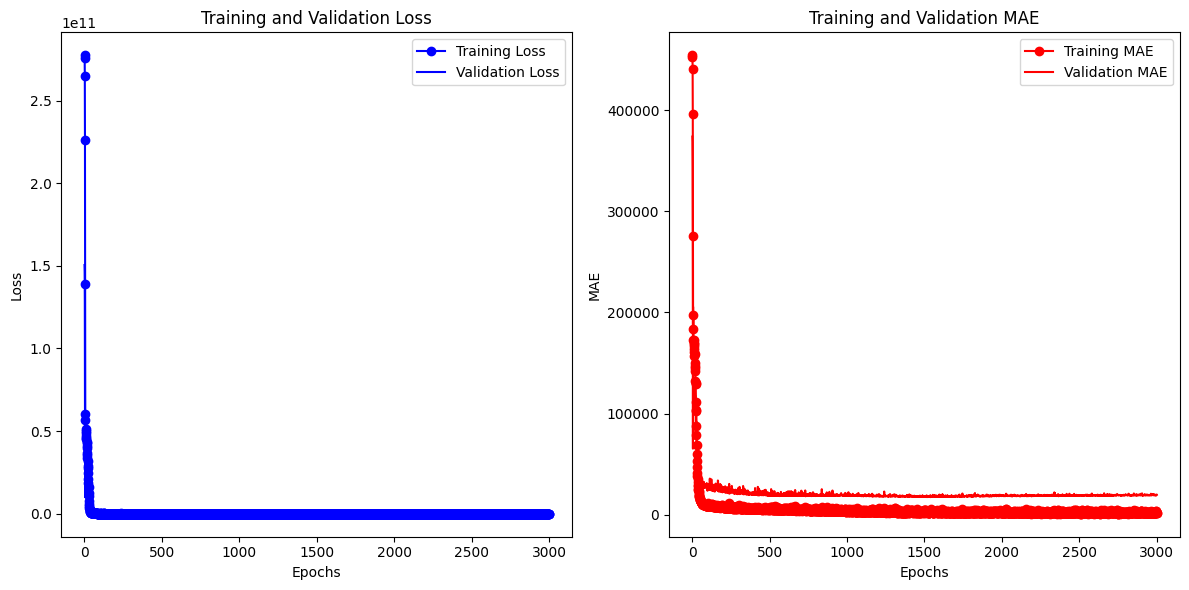

In [ ]:
import matplotlib.pyplot as plt

history = history.history

# Extracting data
epochs = range(1, len(history['loss']) + 1)
loss_values = history['loss']
mae_values = history['mae']
val_loss_values = history['val_loss']
val_mae_values = history['val_mae']

# Plotting
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, mae_values, 'ro-', label='Training MAE')
plt.plot(epochs, val_mae_values, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
X_preprocessed.shape

(1470, 1523)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer



# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('yield')  # Assuming 'yield' is your target variable

# Define Transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a full pipeline with the model
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

# Splitting the dataset into the Training set and Test set
X = data.drop('yield', axis=1)
y = data['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
full_pipeline.fit(X_train, y_train)

# Predicting the Test set results
y_pred = full_pipeline.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")




Mean Absolute Error (MAE): 1140.4549638172957
Mean Squared Error (MSE): 3734685.9685746958
Root Mean Squared Error (RMSE): 1932.5335620823498
R^2 Score: 0.9999318537007823


In [ ]:
print(y_test[:5] , y_pred[:5])

1041    392342.937018
184     454051.802042
1222    343344.604680
67      152790.251724
220     251649.878527
Name: yield, dtype: float64 [396082.80256096 453884.06196289 342796.64312575 153563.74382206
 250144.60841911]


In [ ]:
# Random Forest hyperparameter grid
param_grid_rf = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [None, 10, 20, 30, 40]
}

# Gradient Boosting hyperparameter grid
param_grid_gb = {
    'model__n_estimators': [100, 200, 300, 400, 600],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5, 7, 9]
}

# XGBoost hyperparameter grid
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300, 400, 600],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5, 7,9]
}


In [ ]:
# Split the dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store models and their grid search objects
models = {
    'RandomForest': (RandomForestRegressor(random_state=42), param_grid_rf),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), param_grid_gb),
    'XGBoost': (XGBRegressor(random_state=42), param_grid_xgb)
}

# Train each model
for name, (model, param_grid) in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Evaluate the model
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")
    print("---------------------------------------------------")


Best parameters for RandomForest: {'model__max_depth': None, 'model__n_estimators': 400}
RandomForest - MAE: 1084.2139793218303, MSE: 3253399.906237124, RMSE: 1803.7183555747067, R^2: 0.9999406356611102
---------------------------------------------------
Best parameters for GradientBoosting: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 600}
GradientBoosting - MAE: 101.2007512972866, MSE: 131402.36835744392, RMSE: 362.4946459707287, R^2: 0.9999976023191274
---------------------------------------------------
Best parameters for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 9, 'model__n_estimators': 600}
XGBoost - MAE: 102.51275237891899, MSE: 78641.71308891663, RMSE: 280.43129834046096, R^2: 0.9999985650355194
---------------------------------------------------


In [ ]:
X.shape

(1470, 27)

In [ ]:
y.shape

(1470,)

In [ ]:
X_train.shape

(1176, 27)

In [ ]:
X[:1]

,district,year,month,area,NDVI_mean,EVI_mean,GNDVI_mean,SAVI_mean,NDMI_mean,BSI_mean,...,MSAVI_mean,NDRE_mean,PSRI_mean,WDRVI_mean,MCARI_mean,ARVI_mean,NDTI_mean,CCCI_mean,PRI_mean,avg_yield
0,attock,2017,11,274017.5893,0.166146,0.147518,0.208949,0.141863,-0.060185,0.04245,...,0.089237,0.117976,0.067058,-0.749666,0.153903,0.173716,0.102484,0.709142,0.016566,14.7


In [ ]:
from scipy.sparse import hstack


# Apply the preprocessor to the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Handle Sparse Matrix: Convert to dense format if necessary
if isinstance(X_train_transformed, np.ndarray):
    X_train_dense = X_train_transformed
    X_test_dense = X_test_transformed
else:
    X_train_dense = X_train_transformed.toarray()
    X_test_dense = X_test_transformed.toarray()

# Extract Feature Names
# This combines feature names from both numerical and categorical transformations
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat']
                                      .named_steps['onehot']
                                      .get_feature_names_out(categorical_cols))

# Ensure the length of feature names matches the number of columns in the transformed data
assert len(feature_names) == X_train_dense.shape[1]

# Create DataFrame from the transformed data
X_train_transformed_df = pd.DataFrame(X_train_dense, columns=feature_names)
X_test_transformed_df = pd.DataFrame(X_test_dense, columns=feature_names)



In [ ]:
X_train_transformed_df[:1]



,year,month,area,NDVI_mean,EVI_mean,GNDVI_mean,SAVI_mean,NDMI_mean,BSI_mean,BUAI_mean,...,district_pakpattan,district_r_y_khan,district_rajanpur,district_rawalpindi,district_sahiwal,district_sargodha,district_sheikhupura,district_sialkot,district_toba_tek_singh,district_vehari
0,-1.451074,0.986412,-0.098517,-1.003581,-1.016219,-0.438597,-0.9633,-1.150406,1.32701,1.183552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
from scipy import sparse

# Apply the preprocessor to the training and testing data
X_train_transformed_1 = preprocessor.fit_transform(X_train)
X_test_transformed_1 = preprocessor.transform(X_test)

# Convert the transformed data to a DataFrame
# Check if the transformed data is a sparse matrix
if sparse.issparse(X_train_transformed_1):
    X_train_transformed_1 = X_train_transformed_1.toarray()
    X_test_transformed_1 = X_test_transformed_1.toarray()

# Get feature names from the preprocessor
feature_names = (numerical_cols +
                 list(preprocessor.named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_cols)))

# Create DataFrames
X_train_transformed_df = pd.DataFrame(X_train_transformed_1, columns=feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed_1, columns=feature_names)

# Save the transformed data to CSV files
X_train_transformed_df.to_csv('drive/MyDrive/X_train_transformed_1.csv', index=False)
X_test_transformed_df.to_csv('drive/MyDrive/X_test_transformed_1.csv', index=False)


In [ ]:
X_train_transformed_1.shape[1]

61

In [ ]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras.backend as K
from keras.regularizers import l1_l2




from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2




from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


# Drop the 'month' column


model = Sequential([

    Dense(128, activation='relu'),




    Dense(64, activation='relu'),



    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', rmse])


# The code for model evaluation and further steps will be provided next.
# This code is for your reference to run in an environment where TensorFlow is installed.
history = model.fit(X_train_transformed_1, y_train, epochs=3000, batch_size=32, validation_split=0.2)

Streaming output truncated to the last 5000 lines.
30/30 [==============================] - 0s 6ms/step - loss: 7306727.5000 - mae: 1970.8582 - rmse: 2620.8083 - val_loss: 12535332.0000 - val_mae: 2743.2979 - val_rmse: 3607.9536
Epoch 502/3000
30/30 [==============================] - 0s 6ms/step - loss: 6816164.0000 - mae: 1883.9849 - rmse: 2529.8582 - val_loss: 26622644.0000 - val_mae: 3955.8027 - val_rmse: 5162.8086
Epoch 503/3000
30/30 [==============================] - 0s 6ms/step - loss: 8405389.0000 - mae: 2089.2803 - rmse: 2783.2651 - val_loss: 15137053.0000 - val_mae: 3047.8633 - val_rmse: 3934.1089
Epoch 504/3000
30/30 [==============================] - 0s 6ms/step - loss: 8421485.0000 - mae: 2154.3599 - rmse: 2855.6450 - val_loss: 14036255.0000 - val_mae: 2940.9731 - val_rmse: 3859.1116
Epoch 505/3000
30/30 [==============================] - 0s 6ms/step - loss: 12174351.0000 - mae: 2484.6670 - rmse: 3389.0442 - val_loss: 22946894.0000 - val_mae: 3823.7656 - val_rmse: 4844.043

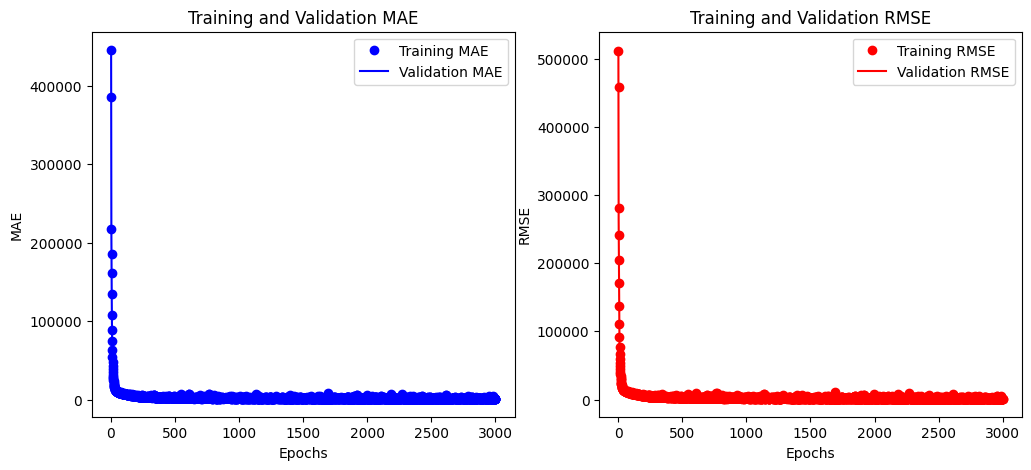

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
# ... other imports and the custom RMSE function

# Define and compile your model here
# ...

# Train the model

# Extract MAE and RMSE values
mae = history.history['mae']
val_mae = history.history['val_mae']
rmse = history.history['rmse']
val_rmse = history.history['val_rmse']

# Plotting
epochs = range(1, len(mae) + 1)

plt.figure(figsize=(12, 5))

# MAE plot
plt.subplot(1, 2, 1)
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# RMSE plot
plt.subplot(1, 2, 2)
plt.plot(epochs, rmse, 'ro', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.show()


In [ ]:
loss, mae, rmse_value = model.evaluate(X_test_transformed_1, y_test)

print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse_value}")

10/10 [==============================] - 0s 7ms/step - loss: 4393340.5000 - mae: 1497.2538 - rmse: 2046.0637
Test Loss: 4393340.5
Test MAE: 1497.2537841796875
Test RMSE: 2046.063720703125
